### 1. What is unsupervised learning in the context of machine learning?
Unsupervised learning involves training algorithms on data without labeled outputs. The goal is to discover hidden patterns or groupings, such as clusters, in the data.

### 2. How does K-Means clustering algorithm work?
K-Means partitions data into K clusters by:
- Randomly initializing K centroids
- Assigning each point to the nearest centroid
- Updating centroids as the mean of assigned points
- Repeating until convergence (no change in assignments or centroids)

### 3. Explain the concept of a dendrogram in hierarchical clustering.
A dendrogram is a tree-like diagram that shows the arrangement of clusters formed by hierarchical clustering. It visualizes how clusters merge or split at different levels of similarity.

### 4. What is the main difference between K-Means and Hierarchical Clustering?
- **K-Means**: Requires predefined number of clusters (K), uses centroid-based partitioning.
- **Hierarchical**: Builds a tree of clusters without needing K upfront, based on distance/linkage.

### 5. What are the advantages of DBSCAN over K-Means?
- Handles clusters of arbitrary shape
- Detects noise/outliers
- No need to specify number of clusters
- Better for data with varying density

### 6. When would you use Silhouette Score in clustering?
Silhouette Score evaluates clustering quality by measuring how similar a point is to its own cluster vs. others. Use it to:
- Choose optimal number of clusters
- Compare clustering algorithms

### 7. What are the limitations of Hierarchical Clustering?
- Computationally expensive for large datasets
- Sensitive to noise and outliers
- Once merged/split, cannot undo decisions

### 8. Why is feature scaling important in clustering algorithms like K-Means?
K-Means relies on distance metrics (e.g., Euclidean). Features with larger scales dominate clustering. Scaling ensures fair contribution from all features.

### 9. How does DBSCAN identify noise points?
Points not belonging to any cluster (i.e., not within ε radius of enough neighbors) are labeled as noise.

### 10. Define inertia in the context of K-Means.
Inertia is the sum of squared distances between each point and its assigned centroid. Lower inertia indicates tighter clusters.

### 11. What is the elbow method in K-Means clustering?
Plot inertia vs. number of clusters (K). The "elbow" point where inertia reduction slows indicates optimal K.

### 12. Describe the concept of "density" in DBSCAN.
Density is defined by:
- ε (radius around a point)
- MinPts (minimum number of points within ε)
A dense region has at least MinPts within ε.

### 13. Can hierarchical clustering be used on categorical data?
Yes, but requires appropriate distance metrics (e.g., Hamming distance) or encoding methods (e.g., one-hot).

### 14. What does a negative Silhouette Score indicate?
The point may be assigned to the wrong cluster — it's closer to another cluster than its own.

### 15. Explain the term "linkage criteria" in hierarchical clustering.
Linkage criteria determine how distances between clusters are calculated:
- Single: nearest points
- Complete: farthest points
- Average: mean distance
- Ward: minimizes variance

### 16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
K-Means assumes equal-sized, spherical clusters. It struggles with:
- Uneven cluster sizes
- Non-spherical shapes
- Varying densities

### 17. What are the core parameters in DBSCAN, and how do they influence clustering?
- **ε (epsilon)**: radius for neighborhood
- **MinPts**: minimum points to form a dense region
These control cluster formation and noise detection.

### 18. How does K-Means++ improve upon standard K-Means initialization?
K-Means++ selects initial centroids more strategically:
- First centroid is random
- Subsequent centroids are chosen with probability proportional to distance from existing centroids
This reduces chances of poor clustering.

### 19. What is agglomerative clustering?
A bottom-up hierarchical method:
- Starts with each point as its own cluster
- Iteratively merges closest clusters
- Continues until one cluster or desired number is reached

### 20. What makes Silhouette Score a better metric than just inertia for model evaluation?
- Inertia only measures compactness
- Silhouette Score balances compactness and separation
- Works across different clustering algorithms


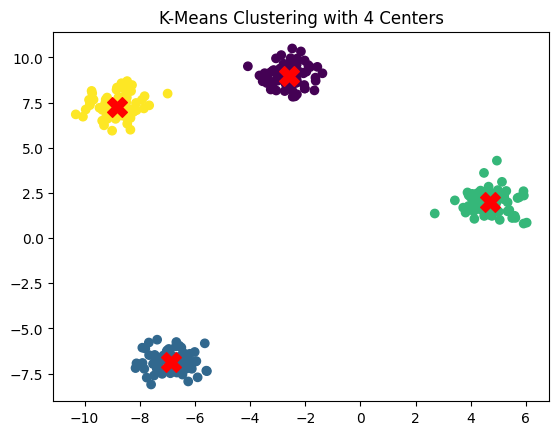

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering with 4 Centers")
plt.show()


In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

data = load_wine()
X = StandardScaler().fit_transform(data.data)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))


Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


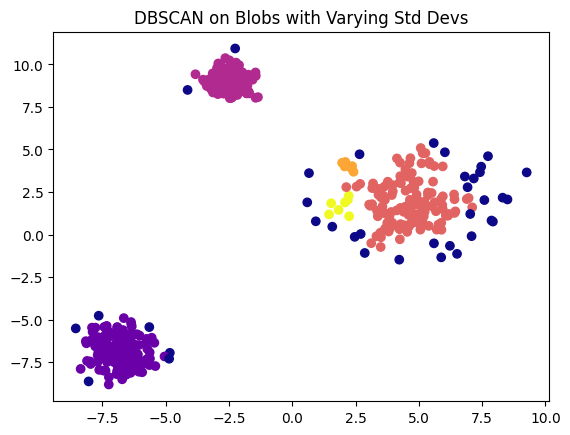

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=3, cluster_std=[0.5, 1.5, 0.8], random_state=42)
db = DBSCAN(eps=0.6, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap='plasma')
plt.title("DBSCAN on Blobs with Varying Std Devs")
plt.show()


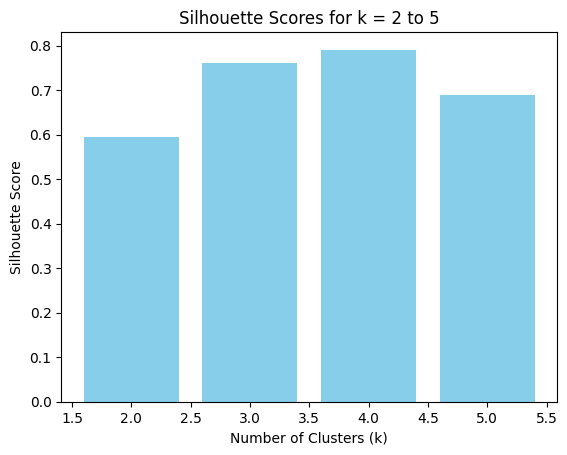

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, random_state=42)
scores = []
for k in range(2, 6):
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.bar(range(2, 6), scores, color='skyblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k = 2 to 5")
plt.show()


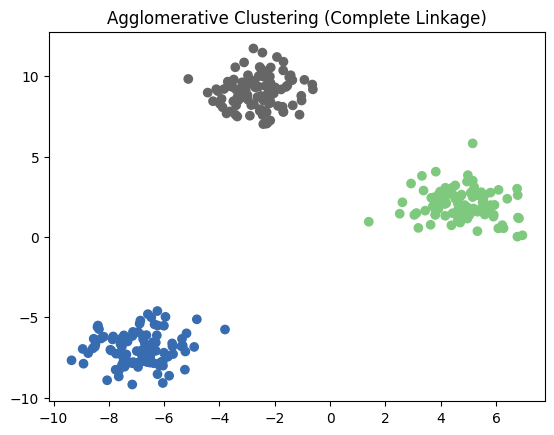

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


In [6]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

X = StandardScaler().fit_transform(load_wine().data)
labels = DBSCAN(eps=1.2, min_samples=5).fit_predict(X)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


In [7]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X = StandardScaler().fit_transform(load_iris().data)
labels = DBSCAN(eps=0.6, min_samples=5).fit_predict(X)
n_noise = list(labels).count(-1)
print("Number of noise points:", n_noise)


Number of noise points: 26


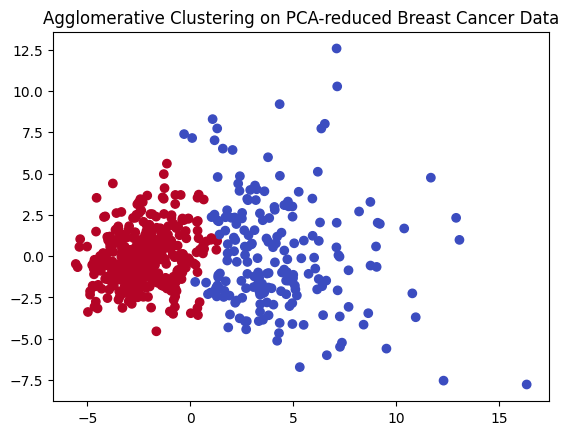

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X = StandardScaler().fit_transform(load_breast_cancer().data)
X_pca = PCA(n_components=2).fit_transform(X)
labels = AgglomerativeClustering(n_clusters=2).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm')
plt.title("Agglomerative Clustering on PCA-reduced Breast Cancer Data")
plt.show()


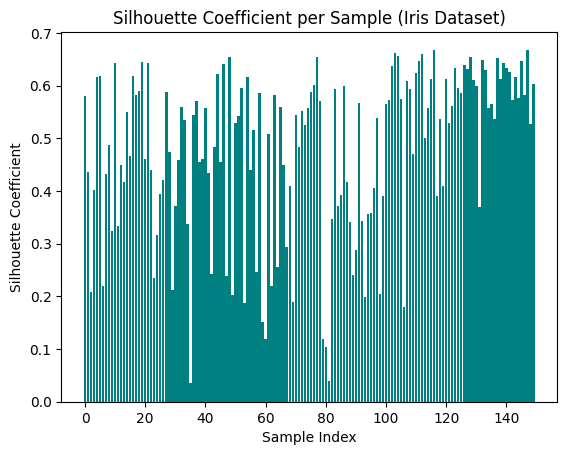

In [9]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

X = StandardScaler().fit_transform(load_iris().data)
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)
sil_vals = silhouette_samples(X, labels)

plt.bar(range(len(sil_vals)), sil_vals, color='teal')
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient per Sample (Iris Dataset)")
plt.show()


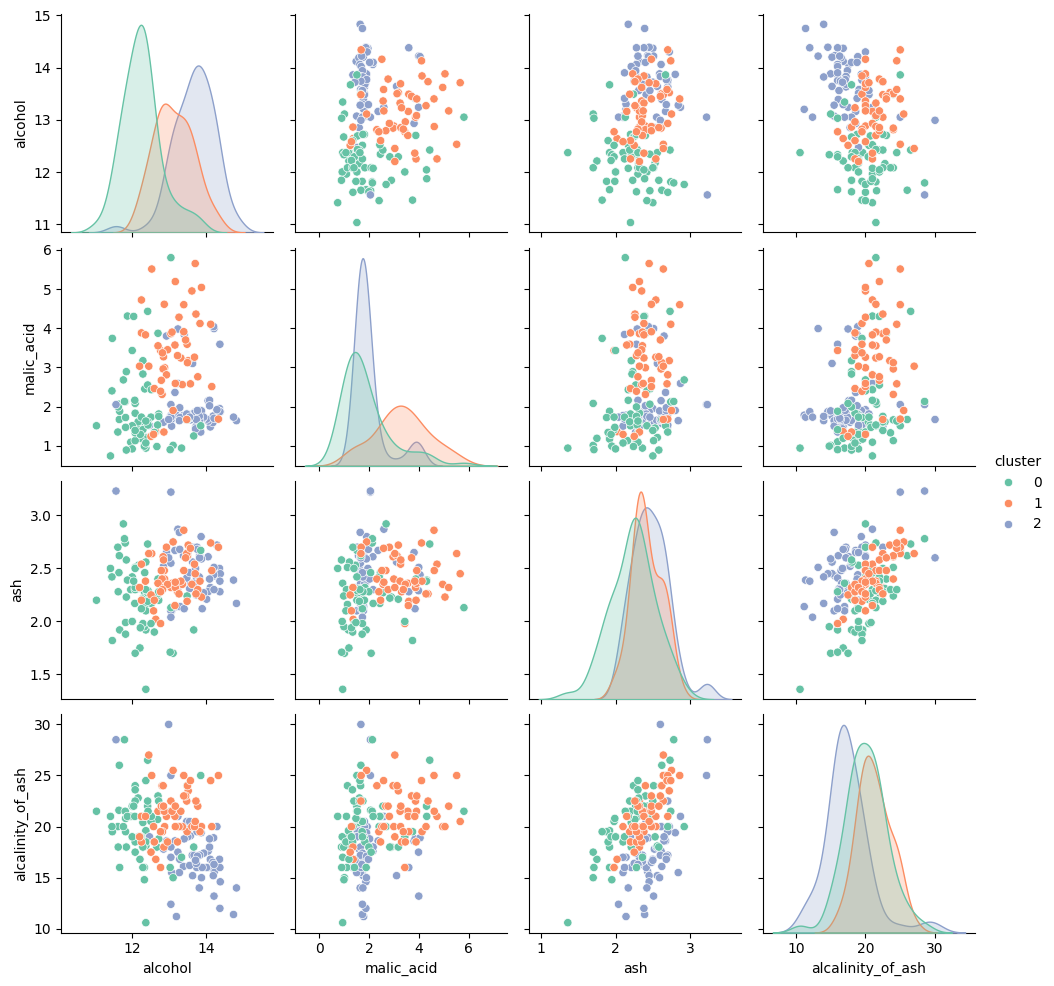

In [10]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

data = load_wine()
df = pd.DataFrame(data.data[:, :4], columns=data.feature_names[:4])
df['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(StandardScaler().fit_transform(data.data))

sns.pairplot(df, hue='cluster', palette='Set2')
